O conjunto de dados diabetes é um conjunto de dados incorporado no scikit-learn.

age: Idade do paciente.
sex: Sexo do paciente (0=feminino, 1=masculino).
bmi: Índice de Massa Corporal (IMC) do paciente.
bp: Pressão sanguínea média do paciente.
s1 a s6: Seis medidas diferentes relacionadas ao soro sanguíneo do paciente. 
target: Uma medida quantitativa de progressão da diabetes um ano após o início do estudo.

In [9]:
from sklearn import datasets
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Carregar o conjunto de dados diabetes
diabetes = datasets.load_diabetes()
data = pd.DataFrame(data=np.c_[diabetes['data'], diabetes['target']], columns=diabetes['feature_names'] + ['target'])

# Selecionar todas as variáveis como preditoras
X = data.drop('target', axis=1)
y = data['target']

# Adicionar uma coluna de uns para o termo constante
X_with_const = sm.add_constant(X)

In [11]:
# Ajustar o modelo de regressão linear múltipla
model = sm.OLS(y, X_with_const).fit()

# Calcular os resíduos
residuals = model.resid

# Imprimir um resumo dos resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           3.83e-62
Time:                        18:01:22   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

Verificar pressupostos

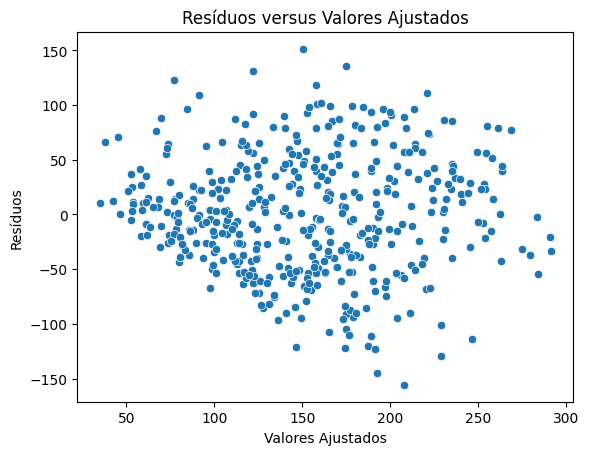

In [12]:
# 1. Resíduos versus valores ajustados (homocedasticidade)
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.title('Resíduos versus Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.show()

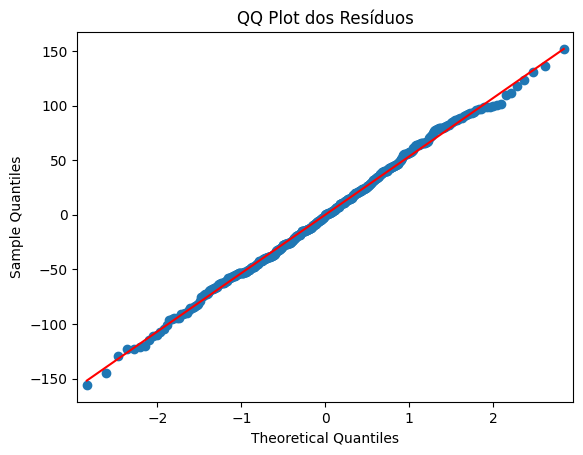

Teste de Shapiro-Wilk - Estatística: 0.9970647692680359, Valor p: 0.6161732077598572


In [13]:
# 2. Normalidade dos resíduos (QQ Plot e Teste de Shapiro-Wilk)
sm.qqplot(residuals, line='s')
plt.title('QQ Plot dos Resíduos')
plt.show()

# Teste de Shapiro-Wilk
stat, p_value = shapiro(residuals)
print(f'Teste de Shapiro-Wilk - Estatística: {stat}, Valor p: {p_value}')

In [18]:
# 3. Independência dos resíduos (Teste de Durbin-Watson)
durbin_watson_stat = durbin_watson(residuals)
print(f'Teste de Durbin-Watson: {durbin_watson_stat}')

#Se o valor de DW estiver próximo a 2, sugere que não há autocorrelação significativa nos resíduos.
#Se o valor de DW for significativamente menor que 2, sugere autocorrelação positiva.
#Se o valor de DW for significativamente maior que 2, sugere autocorrelação negativa.

Teste de Durbin-Watson: 2.028543219254427


In [21]:
# 4. Multicolinearidade (Fator de Inflação de Variância - VIF)
vif = pd.DataFrame()
vif["Variável"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nFator de Inflação de Variância (VIF):\n")
print(vif)




Fator de Inflação de Variância (VIF):

  Variável        VIF
0      age   1.217307
1      sex   1.278071
2      bmi   1.509437
3       bp   1.459428
4       s1  59.202510
5       s2  39.193370
6       s3  15.402156
7       s4   8.890986
8       s5  10.075967
9       s6   1.484623
